# SYRIATEL CUSTOMER CHURN

## OVERVIEW

SyriaTel continues to struggle with client retention in the dynamic world of telecommunications. Gaining a competitive edge in the face of fast market change requires an awareness of and commitment to tackling the issues that contribute to customer turnover. In order to detect trends in SyriaTel's customer data that would indicate a higher chance of churn, the main goal of this project is to create a predictive model.

## INTRODUCTION

Customer retention is a major problem for businesses looking to build enduring connections and maintain income streams in the ever-changing telecoms market. This also applies to SyriaTel, a major participant in the telecommunications industry. As the telecommunications industry develops further, it is now strategically necessary to identify and manage the issues that contribute to customer attrition.

The purpose of this project is to develop a predictive model that will identify trends in SyriaTel's customer data that can point to a higher risk of customer attrition. Churn, which is the word for a customer's termination of services, affects the bottom line but also highlights areas where customer happiness and service quality might be improved.

## PROBLEM STATEMENT

SyriaTel's primary concern is that factors that cause people to stop using their services might result in a loss of income and clientele. Using use patterns and historical data, the idea is to create a prediction tool that may foretell client disengagement. SyriaTel might mitigate the financial effect of customer attrition by identifying customers who are likely to leave and putting in place targeted retention initiatives to keep them onboard.

## <medium> Main Objectives </medium>

The goal of the project is to anticipate customer attrition for SyriaTel by using historical data to construct a binary classification model. Through the extraction of actionable information from the model, our main goal is to customize targeted retention methods for clients that pose a risk, hence improving overall customer happiness and bolstering SyriaTel's customer retention efforts.


## <medium> General Objectives</medium>

1. Develop a robust binary classification model capable of accurately predicting customer churn based on historical data.

2. Extract actionable insights from the predictive model to provide a deeper understanding of factors contributing to customer churn.

3. Tailor and optimize retention strategies by utilizing the insights derived from the model, specifically targeting at-risk customers.

4. Utilize identified patterns and factors influencing churn to enhance overall customer satisfaction and experience.

5. Document the entire process, from data preparation to model development, and effectively communicate findings and recommendations to stakeholders, ensuring transparency and understanding.

## DATA UNDERSTANDING

The dataset for this project contains information related to SyriaTel's customers and their interactions with the telecommunications services. The features (columns) in the dataset capture various aspects of customer behavior and usage patterns. The process of explanatory data analysis is employed to comprehensively understand the dataset. This involves tasks such as identifying missing values, examining data types, detecting outliers, and extracting pertinent features for subsequent analysis.

### <medium>  Importing libraries</medium>

In [63]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

%matplotlib inline

### <medium> Loading and previewing the dataset</medium>

In [2]:

data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# view the first rows of the dataframe
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Basic statistics of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
# Number of rows and columns
data.shape

(3333, 21)

## DATA CLEANING

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [6]:
# Check data types
data_types = data.dtypes
print(data_types)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [7]:
# Converting 'international plan' and 'voice mail plan' to Numeric
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

# Converting 'churn' to Numeric
data['churn'] = data['churn'].astype(int)

In [8]:
# Check unique values in 'state'
unique_states = data['state'].unique()
print("Unique States:\n", unique_states)

Unique States:
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [9]:
# Dropping 'state' and 'phone number'
data = data.drop(['state', 'phone number'], axis=1)

In [10]:
# Check the cleaned dataset
print("Cleaned Dataset:\n", data.head())

Cleaned Dataset:
    account length  area code  international plan  voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47         

### <medium>  Outliers</medium>

In [11]:
numerical_columns = ['account length', 'total day minutes', 'total day calls',
                     'total day charge', 'total eve minutes', 'total eve calls',
                     'total eve charge', 'total night minutes', 'total night calls',
                     'total night charge', 'total intl minutes', 'total intl calls',
                     'total intl charge', 'customer service calls']

# Identifying outliers using IQR method
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

account length: Lower Bound = -5.5, Upper Bound = 206.5
total day minutes: Lower Bound = 34.64999999999996, Upper Bound = 325.45000000000005
total day calls: Lower Bound = 46.5, Upper Bound = 154.5
total day charge: Lower Bound = 5.890000000000001, Upper Bound = 55.33
total eve minutes: Lower Bound = 63.54999999999997, Upper Bound = 338.35
total eve calls: Lower Bound = 46.5, Upper Bound = 154.5
total eve charge: Lower Bound = 5.4, Upper Bound = 28.759999999999998
total night minutes: Lower Bound = 64.54999999999998, Upper Bound = 337.75
total night calls: Lower Bound = 48.0, Upper Bound = 152.0
total night charge: Lower Bound = 2.914999999999999, Upper Bound = 15.195
total intl minutes: Lower Bound = 3.1000000000000005, Upper Bound = 17.5
total intl calls: Lower Bound = -1.5, Upper Bound = 10.5
total intl charge: Lower Bound = 0.8449999999999995, Upper Bound = 4.7250000000000005
customer service calls: Lower Bound = -0.5, Upper Bound = 3.5


In [12]:
# Handling outliers using calculated bounds
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replacing outliers with lower/upper bounds
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

## EXPLORATORY DATA ANALYSIS

### <medium> 1. Univariate Analysis</medium>

#### <medium> i) Target Variable Distribution</medium>

In [13]:
# Class distribution
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

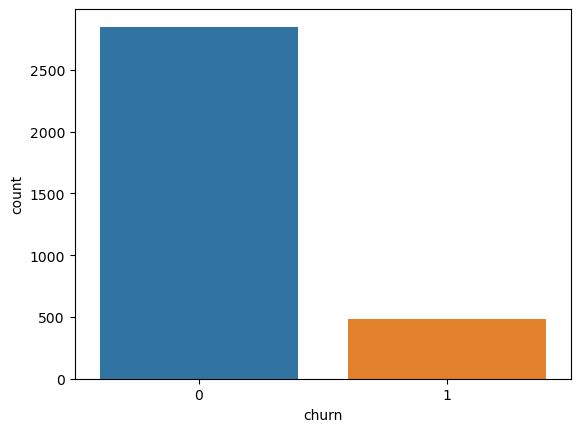

In [14]:
# The distribution of the target variable ('churn')
sns.countplot(x='churn', data=data)
plt.show()

#### <medium> ii) Numerical Features</medium>

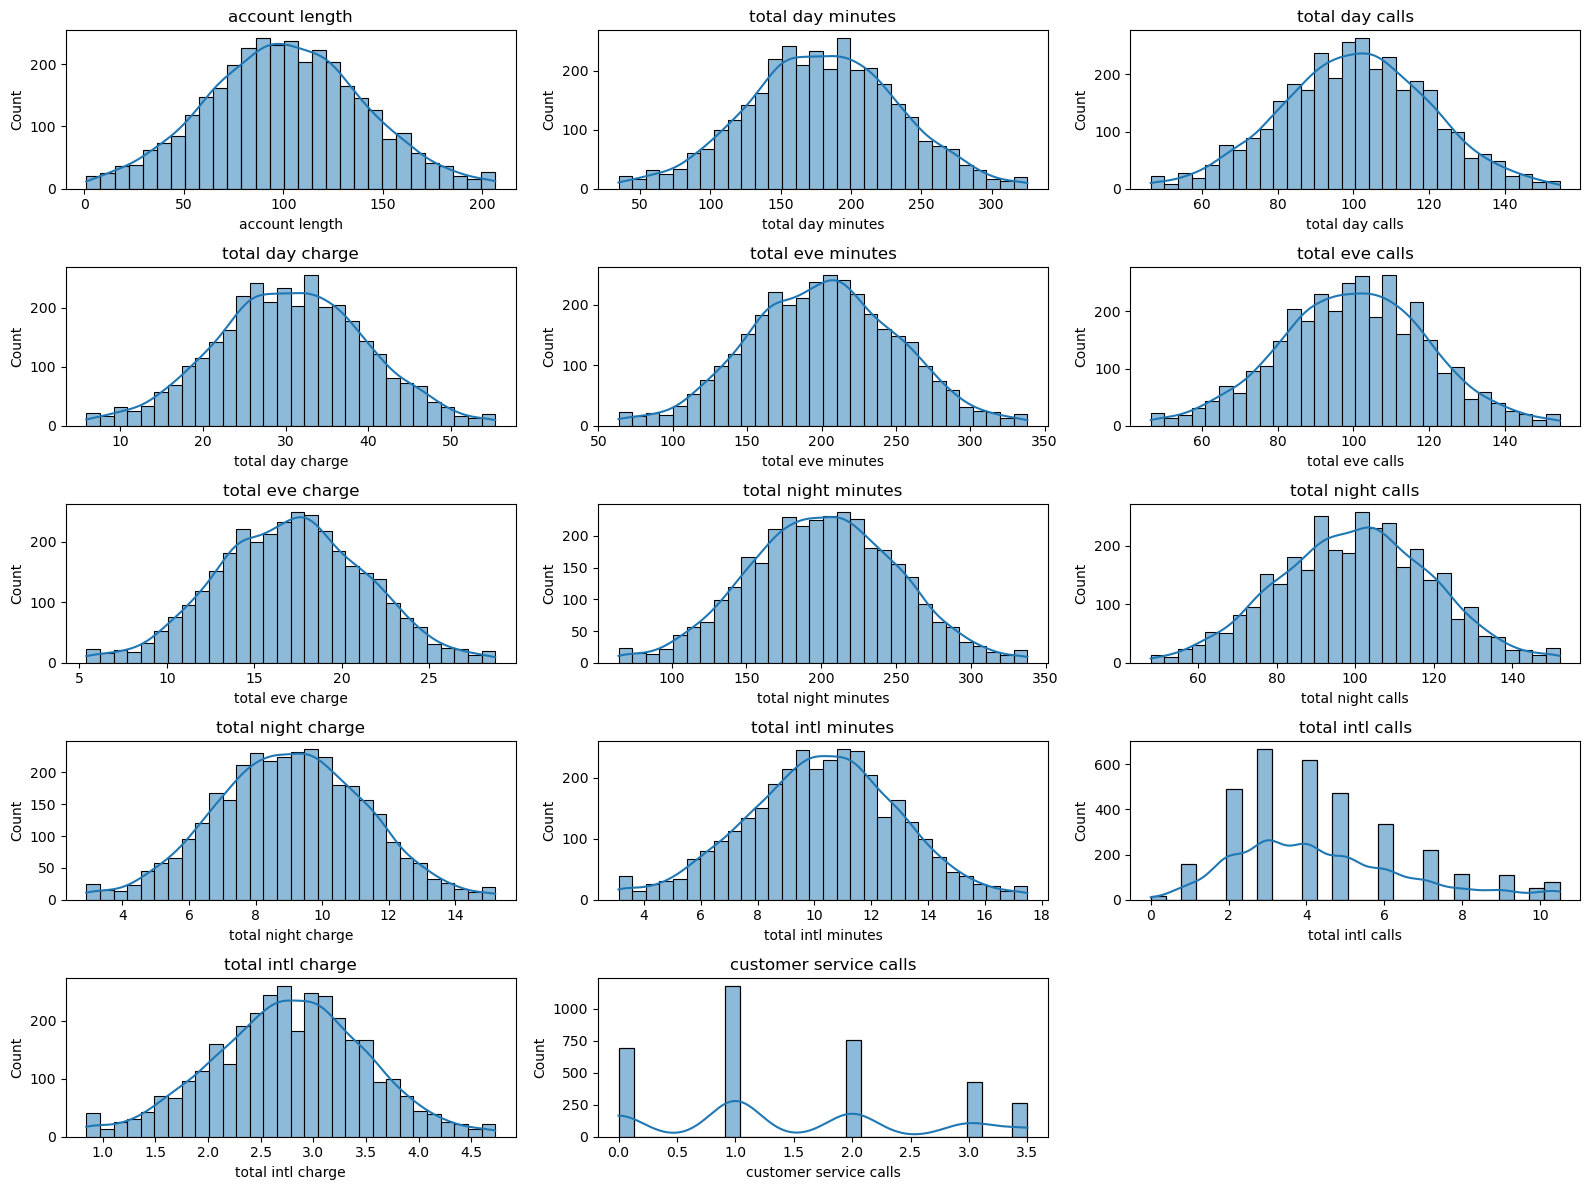

In [15]:
# The distribution of numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1): 
    plt.subplot(5, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### <medium> 2. Multivariate Analysis</medium>

#### <medium> i) Correlation Matrix</medium>

A heatmap showing the correlation between numerical features.

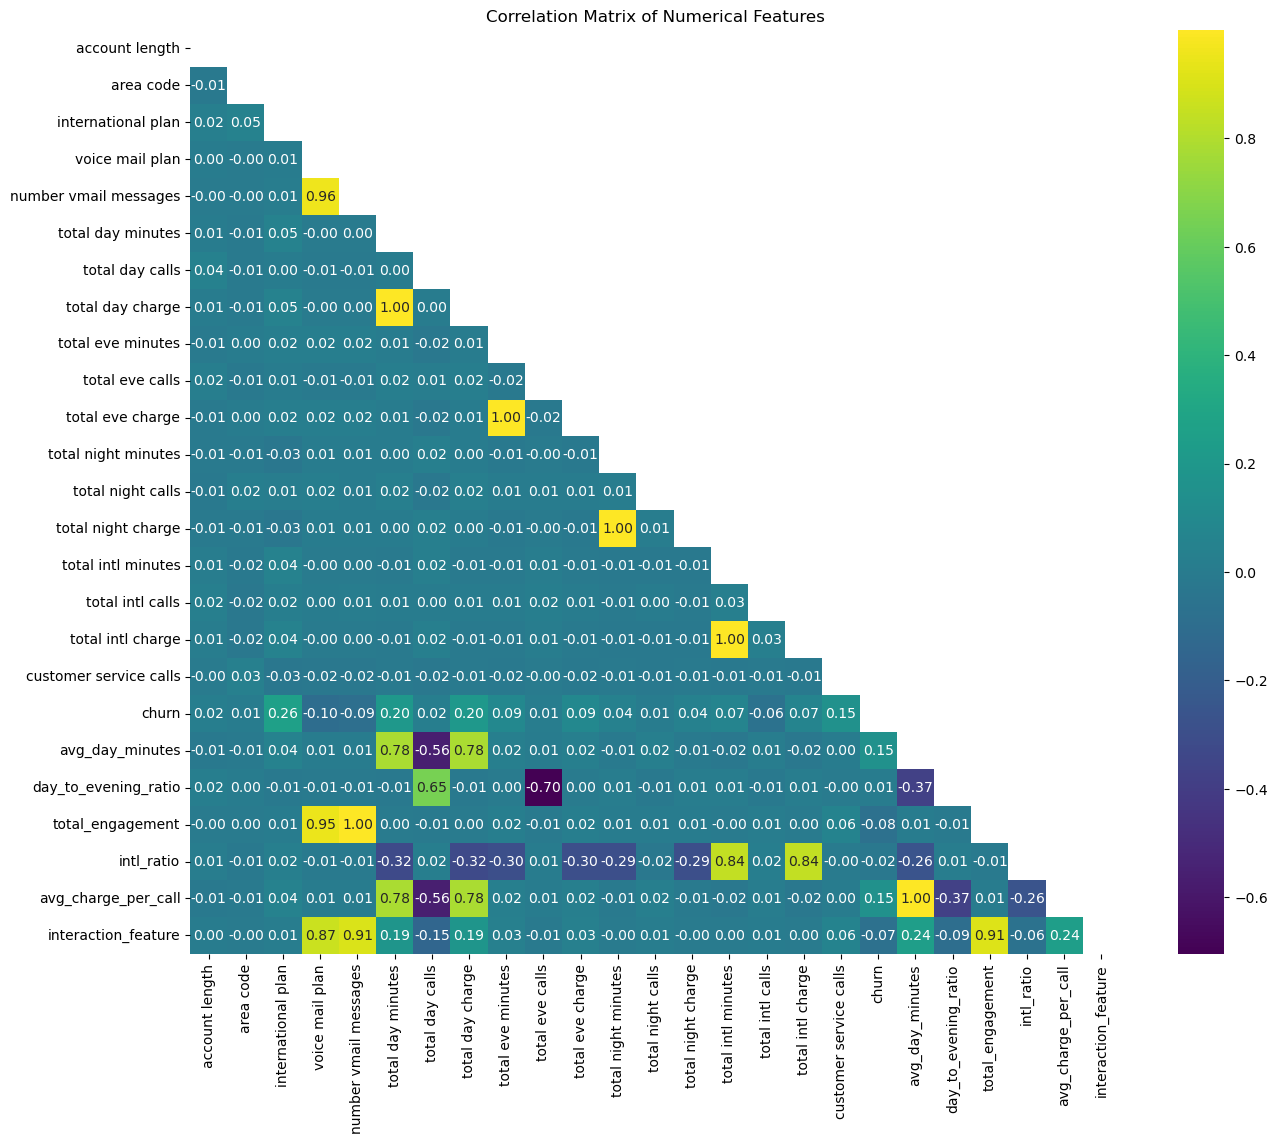

In [42]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the half of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [17]:
# Updated DataFrame
print(data.head())

   account length  area code  international plan  voice mail plan  \
0           128.0        415                   0                1   
1           107.0        415                   0                1   
2           137.0        415                   0                0   
3            84.0        408                   1                0   
4            75.0        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1            110.0   
1                     26              161.6            123.0   
2                      0              243.4            114.0   
3                      0              299.4             71.0   
4                      0              166.7            113.0   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07             197.40             99.0             16.78   
1             27.47             195.50        

#### <medium> ii) Categorical Features</medium>

In [18]:
# Unique values in 'international plan' column
print("Unique values in 'international plan':", data['international plan'].unique())

Unique values in 'international plan': [0 1]


In [19]:
# Replacing missing values in 'international plan' with 0
data['international plan'].fillna(0, inplace=True)

# Unique values
print("Unique values in 'international plan':", data['international plan'].unique())

Unique values in 'international plan': [0 1]


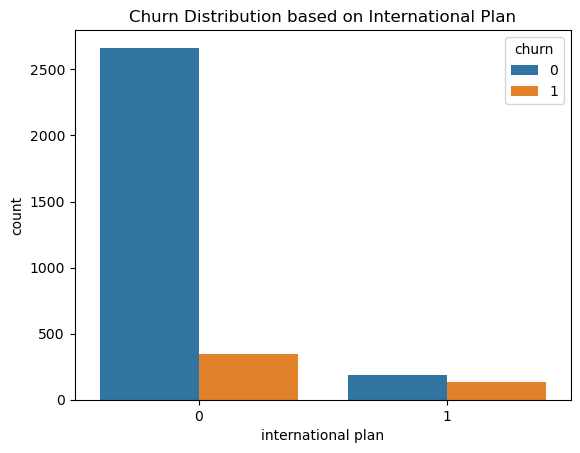

In [20]:
# The Distribution of categorical features (International Plan)
sns.countplot(x='international plan', hue='churn', data=data)
plt.title('Churn Distribution based on International Plan')
plt.show()

In [21]:
# Unique values in 'international plan' column
print("Unique values in 'international plan':", data['international plan'].unique())

Unique values in 'international plan': [0 1]


In [22]:
# Replacing missing values in 'international plan' with 0
data['voice mail plan'].fillna(0, inplace=True)

# Unique values
print("Unique values in 'voice mail plan':", data['voice mail plan'].unique())

Unique values in 'voice mail plan': [1 0]


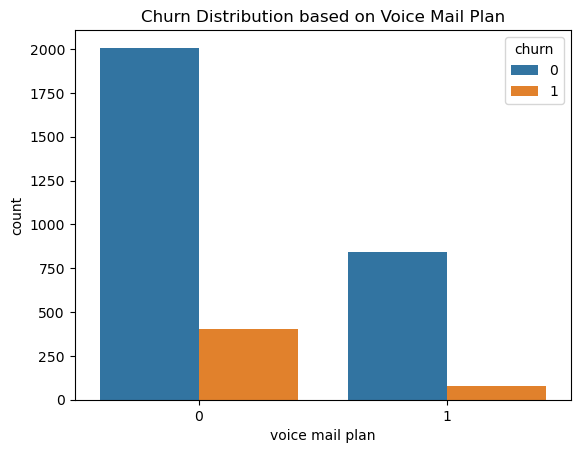

In [23]:
# The Distribution of categorical features (International Plan)
sns.countplot(x='voice mail plan', hue='churn', data=data)
plt.title('Churn Distribution based on Voice Mail Plan')
plt.show()

#### <medium> iii) Pairplot</medium>

A pairplot for selected numerical features, with differentiating points for churned and non-churned customers.

In [24]:
# Pairplot for selected numerical features
#selected_numerical_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'customer service calls', 'churn']

#sns.pairplot(data[selected_numerical_features], hue='churn', markers=["o", "s"], diag_kind='kde')
#plt.suptitle("Pairplot of Selected Numerical Features", y=1.02, fontsize=16)
#plt.show()

## Feature Engineering

In [25]:
# Feature Engineering

# Usage Patterns
data['avg_day_minutes'] = data['total day minutes'] / data['total day calls']
data['day_to_evening_ratio'] = data['total day calls'] / data['total eve calls']

# Customer Engagement
data['total_engagement'] = data['customer service calls'] + data['number vmail messages']

# Account Longevity
data['account_length_category'] = pd.cut(data['account length'], bins=[0, 100, 200, float('inf')], labels=['short', 'medium', 'long'])

# International Usage
data['intl_ratio'] = data['total intl minutes'] / (data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes'])

# Billing Information
data['avg_charge_per_call'] = data['total day charge'] / data['total day calls']

# Interaction Features
data['interaction_feature'] = data['avg_day_minutes'] * data['total_engagement']

# Display the updated dataset
print(data.head())

   account length  area code  international plan  voice mail plan  \
0           128.0        415                   0                1   
1           107.0        415                   0                1   
2           137.0        415                   0                0   
3            84.0        408                   1                0   
4            75.0        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1            110.0   
1                     26              161.6            123.0   
2                      0              243.4            114.0   
3                      0              299.4             71.0   
4                      0              166.7            113.0   

   total day charge  total eve minutes  total eve calls  ...  \
0             45.07             197.40             99.0  ...   
1             27.47             195.50            103.0  ...   
2       

##  DATA PREPROCESSING

### <medium>  Encoding Categorical Variables</medium>

In [26]:
# Unique values in 'international plan' and 'voice mail plan' columns
print("Unique values in 'international plan':", data['international plan'].unique())
print("Unique values in 'voice mail plan':", data['voice mail plan'].unique())

Unique values in 'international plan': [0 1]
Unique values in 'voice mail plan': [1 0]


In [27]:
# Convert categorical labels to numerical labels for 'churn', 'international plan', and 'voice mail plan'
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

In [28]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 account length             0
area code                  0
international plan         0
voice mail plan            0
number vmail messages      0
total day minutes          0
total day calls            0
total day charge           0
total eve minutes          0
total eve calls            0
total eve charge           0
total night minutes        0
total night calls          0
total night charge         0
total intl minutes         0
total intl calls           0
total intl charge          0
customer service calls     0
churn                      0
avg_day_minutes            0
day_to_evening_ratio       0
total_engagement           0
account_length_category    0
intl_ratio                 0
avg_charge_per_call        0
interaction_feature        0
dtype: int64


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   account length           3333 non-null   float64 
 1   area code                3333 non-null   int64   
 2   international plan       3333 non-null   int64   
 3   voice mail plan          3333 non-null   int64   
 4   number vmail messages    3333 non-null   int64   
 5   total day minutes        3333 non-null   float64 
 6   total day calls          3333 non-null   float64 
 7   total day charge         3333 non-null   float64 
 8   total eve minutes        3333 non-null   float64 
 9   total eve calls          3333 non-null   float64 
 10  total eve charge         3333 non-null   float64 
 11  total night minutes      3333 non-null   float64 
 12  total night calls        3333 non-null   float64 
 13  total night charge       3333 non-null   float64 
 14  total in

## Feature Scaling

In [30]:
scaler = StandardScaler()
numerical_features = ['account length', 'total day minutes', 'total day calls',
                     'total day charge', 'total eve minutes', 'total eve calls',
                     'total eve charge', 'total night minutes', 'total night calls',
                     'total night charge', 'total intl minutes', 'total intl calls',
                     'total intl charge', 'customer service calls'] 
data[numerical_features] = scaler.fit_transform(data[numerical_features])

## Train-Test Split

In [31]:
# Features (X) and target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODELING

### <large> Logistic Regression (Baseline Model)</large>

In [32]:
# Separate numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64']).columns
categorical_features = X_train.select_dtypes(include=['category']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessing and logistic regression
logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
class_report = classification_report(y_test, y_pred_logreg)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8650674662668666
Confusion Matrix:
 [[564   2]
 [ 88  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       566
           1       0.87      0.13      0.22       101

    accuracy                           0.87       667
   macro avg       0.87      0.56      0.58       667
weighted avg       0.87      0.87      0.82       667



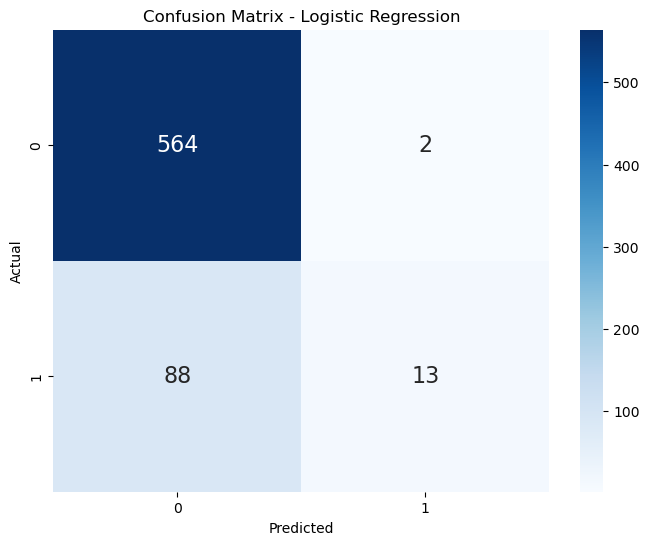

In [70]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model has a high accuracy due to the dominance of the negative class in the dataset. However, the low recall suggests that the model struggles to identify instances of the positive class. Further model improvement may be needed, especially if identifying positive instances is crucial for the business problem.

### Hyperparameter Tuning for Logistic Regression

In [33]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__max_iter': [100, 200, 300],
}

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', Pipeline([('scaler', StandardScaler())]), numerical_features),
        ('categorical', Pipeline([('onehot', OneHotEncoder())]), categorical_features)
    ]
)

# Create the full pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", grid_search.best_params_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_logreg_model.predict(X_test)

# Display the accuracy and other metrics
print("Accuracy (Logistic Regression - Tuned):", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix (Logistic Regression - Tuned):\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report (Logistic Regression - Tuned):\n", classification_report(y_test, y_pred_logreg))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best Hyperparameters for Logistic Regression: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Accuracy (Logistic Regression - Tuned): 0.8650674662668666
Confusion Matrix (Logistic Regression - Tuned):
 [[564   2]
 [ 88  13]]
Classification Report (Logistic Regression - Tuned):
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       566
           1       0.87      0.13      0.22       101

    accuracy                           0.87       667
   macro avg       0.87      0.56      0.58       667
weighted avg       0.87      0.87      0.82       667



The model's accuracy remains unchanged, despite its difficulties in accurately predicting the positive class (class 1), as seen by the poor recall for this class. This indicates a low sensitivity of the model because it is failing to detect a significant proportion of the positive indications.

### <large> Decision Tree</large>

In [34]:
# Create pipeline with preprocessing and decision tree classifier
dtc_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model on the training data
dtc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dtc = dtc_model.predict(X_test)

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
class_report_dtc = classification_report(y_test, y_pred_dtc)

# Display results
print("Accuracy (Decision Tree):", accuracy_dtc)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_dtc)
print("Classification Report (Decision Tree):\n", class_report_dtc)

Accuracy (Decision Tree): 0.8515742128935532
Confusion Matrix (Decision Tree):
 [[510  56]
 [ 43  58]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       566
           1       0.51      0.57      0.54       101

    accuracy                           0.85       667
   macro avg       0.72      0.74      0.73       667
weighted avg       0.86      0.85      0.86       667



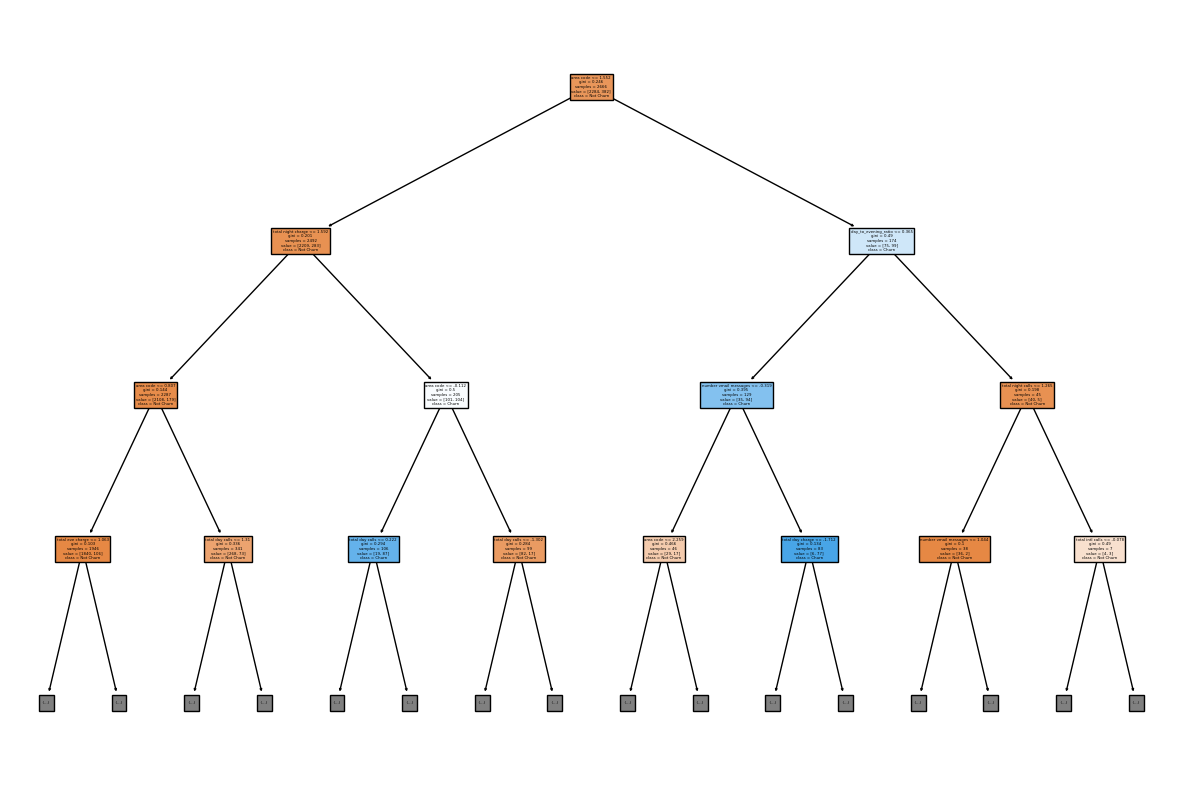

In [35]:
from sklearn.tree import plot_tree

# Extract the decision tree from the pipeline
dtc_classifier = dtc_model.named_steps['classifier']

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dtc_classifier, filled=True, feature_names=X_train.columns.tolist(), class_names=['Not Churn', 'Churn'], max_depth=3)
plt.show()

### Hyperparameter Tuning for Decision Tree

In [36]:
# Define the hyperparameter grid for Decision Tree
param_grid_dtc = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Create the full pipeline with preprocessing and Decision Tree
pipeline_dtc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Create the GridSearchCV object for Decision Tree
grid_search_dtc = GridSearchCV(pipeline_dtc, param_grid_dtc, cv=5, scoring='accuracy')

# Fit the grid search to the data for Decision Tree
grid_search_dtc.fit(X_train, y_train)

# Print the best hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", grid_search_dtc.best_params_)

# Get the best Decision Tree model
best_dtc_model = grid_search_dtc.best_estimator_

# Evaluate the best Decision Tree model on the test set
y_pred_dtc = best_dtc_model.predict(X_test)

# Display the accuracy and other metrics for Decision Tree
print("Accuracy (Decision Tree - Tuned):", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix (Decision Tree - Tuned):\n", confusion_matrix(y_test, y_pred_dtc))
print("Classification Report (Decision Tree - Tuned):\n", classification_report(y_test, y_pred_dtc))

Best Hyperparameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Accuracy (Decision Tree - Tuned): 0.904047976011994
Confusion Matrix (Decision Tree - Tuned):
 [[547  19]
 [ 45  56]]
Classification Report (Decision Tree - Tuned):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       566
           1       0.75      0.55      0.64       101

    accuracy                           0.90       667
   macro avg       0.84      0.76      0.79       667
weighted avg       0.90      0.90      0.90       667



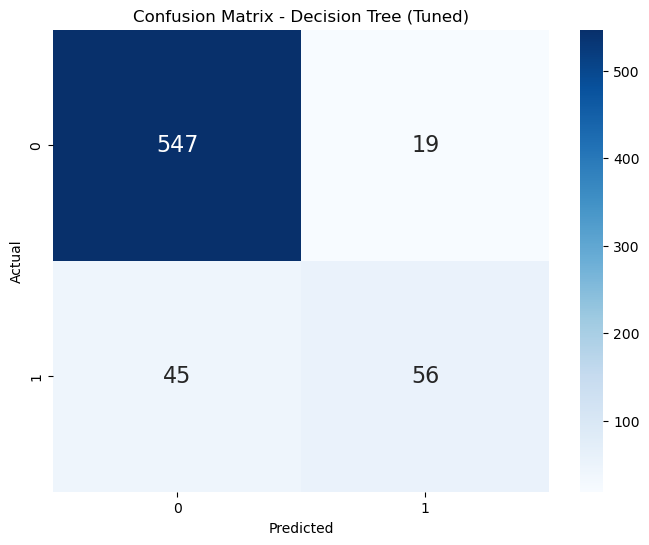

In [67]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The model showed a discernible improvement. With a 90.40% accuracy rate, the overall performance was excellent. The hyperparameters were adjusted to enhance the model's ability to spot complex patterns in the data. As a result, the f1-score, accuracy, and recall for class 1 (Churn) all improved, suggesting that the improved model is better at identifying churn cases.

### <large> Random Forest</large>

In [37]:
# Create pipeline with preprocessing and Random Forest classifier
ranfor_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model on the training data
ranfor_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ranfor = ranfor_model.predict(X_test)

# Evaluate the model
accuracy_ranfor = accuracy_score(y_test, y_pred_ranfor)
conf_matrix_ranfor = confusion_matrix(y_test, y_pred_ranfor)
class_report_ranfor = classification_report(y_test, y_pred_ranfor)

# Display results
print("Accuracy (Random Forest):", accuracy_ranfor)
print("Confusion Matrix (Random Forest):\n", conf_matrix_ranfor)
print("Classification Report (Random Forest):\n", class_report_ranfor)

Accuracy (Random Forest): 0.9145427286356822
Confusion Matrix (Random Forest):
 [[558   8]
 [ 49  52]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.87      0.51      0.65       101

    accuracy                           0.91       667
   macro avg       0.89      0.75      0.80       667
weighted avg       0.91      0.91      0.91       667



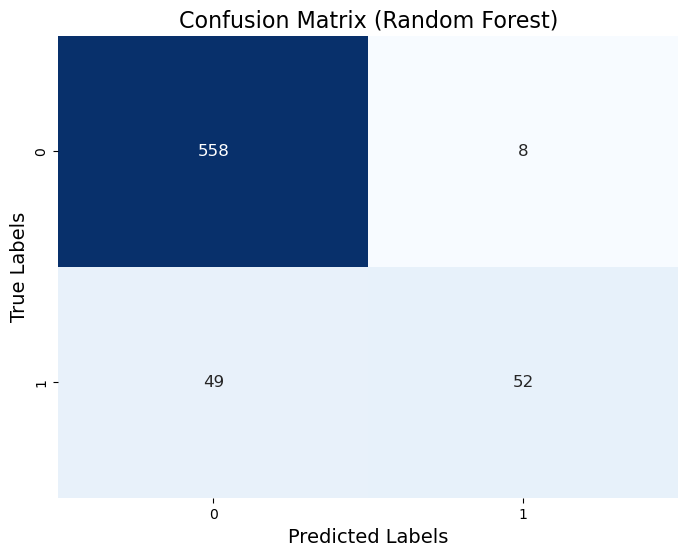

In [66]:
# Plotting the confusion matrix heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ranfor, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"fontsize": 12})
plt.title("Confusion Matrix (Random Forest)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()


The model demonstrates a high accuracy rate and decent precision. However, the recall is relatively lower, suggesting that the model may not be as effective in capturing all instances of the positive class. Further analysis and fine-tuning might be required to improve the model's performance, particularly in identifying instances of "Churn" (class 1).

### <large> XGBoosting</large>

In [38]:
# Create pipeline with preprocessing and XGBoost classifier
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Display results
print("Accuracy (XGBoost):", accuracy_xgb)
print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)
print("Classification Report (XGBoost):\n", class_report_xgb)

Accuracy (XGBoost): 0.9160419790104948
Confusion Matrix (XGBoost):
 [[552  14]
 [ 42  59]]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       566
           1       0.81      0.58      0.68       101

    accuracy                           0.92       667
   macro avg       0.87      0.78      0.81       667
weighted avg       0.91      0.92      0.91       667



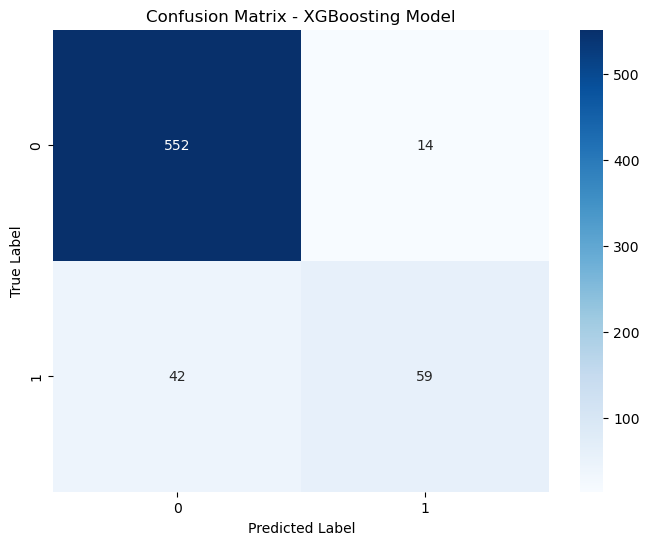

In [65]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - XGBoosting Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The model demonstrates a high accuracy rate and good precision. The recall is also relatively better compared to the Random Forest model, suggesting that the XGBoost model is more effective in capturing instances of the positive class. Further analysis and fine-tuning might still be considered to enhance the model's overall performance.

## Model Performance

1.The logistic regression model, despite being the baseline model, demonstrated reasonable accuracy. However, it struggled with accurately predicting the positive class (churn).



2.The decision tree model showed improvement after hyperparameter tuning, achieving a higher accuracy, especially in detecting churn cases.



3.Both the Random Forest and XGBoost models outperformed other models, with XGBoost exhibiting the highest accuracy and better performance in identifying churn cases.

##  RECOMMENDATIONS

1.Identify factors contributing to churn and implement strategies to address these issues, such as personalized offers, improved customer support, or service enhancements.


2.Regularly evaluate the decison tree model using new data to ensure its effectiveness in real-world scenarios.


3.Establish a feedback loop to gather information on the effectiveness of implemented strategies.


4.Adopt the Tuned Decision Tree Model since it has demonstrated better overall performance, especially in correctly identifying customers likely to churn.


5.SyriaTel should introduce flexible plans or additional services based on identified patterns to meet diverse customer needs.

## NEXT STEPS

1.The company should focus on the implementation of the recommended strategies, monitoring their effectiveness, and iterating based on real-time performance.

2.Collaboration between different departments, employee training, and establishing a continuous feedback loop with customers are critical for success.

3.Conduct training sessions for customer-facing employees to equip them with the knowledge and skills needed to implement customer retention strategies effectively

4.Develop a long-term business plan that incorporates evolving market trends, technological advancements, and customer expectations.

5.Facilitate regular meetings and collaboration between different departments, including data science, marketing, sales, and customer support.

## CONCLUSION

1.Regular monitoring of competitors and adjustments to strategies based on market dynamics will be crucial for maintaining a competitive edge.

2.A customer-centric approach, informed by data-driven insights, will be instrumental in building lasting relationships and loyalty.

3.SyriaTel should plan for the long term, incorporating scalability, sustainability, and adaptability to evolving market trends and customer expectations.

4.Ethical considerations and transparent communication are crucial in building trust with customers and maintaining a positive brand image.

5.Consideration of flexible service plans and continuous innovation in services can cater to diverse customer needs and preferences.